<h1>SwingUp</h1>

<h2>Imports & Input/Output definition</h2>

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

angle = ctrl.Antecedent(np.arange(31, 331, 1), 'angle')
speed = ctrl.Antecedent(np.arange(-11, 11, 1), 'speed')

pos = ctrl.Consequent(np.arange(31, 331, 1), 'pos')

<h2>Graphs definition</h2>

C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


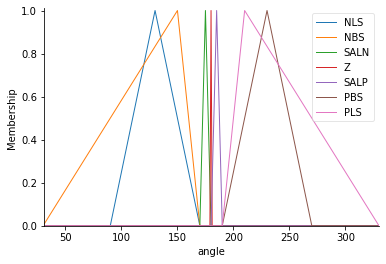

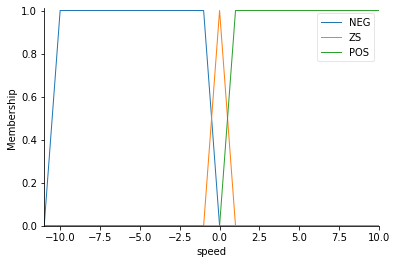

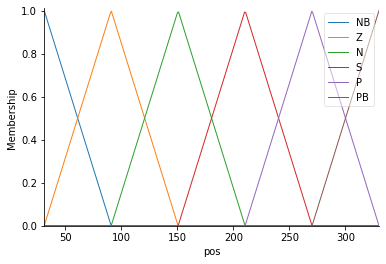

In [3]:
angle['NLS'] = fuzz.trimf(angle.universe, [90, 130, 170])
angle['NBS'] = fuzz.trimf(angle.universe, [30, 150, 170])
angle['SALN'] = fuzz.trimf(angle.universe, [170, 175, 180])
angle['Z'] = fuzz.trimf(angle.universe, [180, 180, 180])
angle['SALP'] = fuzz.trimf(angle.universe, [180, 185, 190])
angle['PBS'] = fuzz.trimf(angle.universe, [190, 230, 270])
angle['PLS'] = fuzz.trimf(angle.universe, [190, 210, 330])

speed['NEG'] = fuzz.trapmf(speed.universe, [-10, -10, -0.1, 0])
speed['ZS'] = fuzz.trapmf(speed.universe, [-0.1, 0, 0, 0.1])
speed['POS'] = fuzz.trapmf(speed.universe, [0.1, 0.1, 10, 10])

pos.automf(names=['NB', 'Z', 'N', 'S', 'P', 'PB'])

angle.view()
speed.view()
pos.view()

<h2>Rules definition</h2>

In [4]:
rule_1 = ctrl.Rule(angle['NLS'] & speed['POS'], pos['NB'])
rule_2 = ctrl.Rule(angle['NBS'] & speed['POS'], pos['Z'])
rule_3 = ctrl.Rule(angle['SALN'] & speed['POS'], pos['N'])

rule_4 = ctrl.Rule(angle['Z'] & speed['ZS'], pos['S'])

rule_5 = ctrl.Rule(angle['SALP'] & speed['NEG'], pos['P'])
rule_6 = ctrl.Rule(angle['PBS'] & speed['NEG'], pos['Z'])
rule_7 = ctrl.Rule(angle['PLS'] & speed['NEG'], pos['PB'])

controller = ctrl.ControlSystem([rule_1, rule_2, rule_3,rule_4, rule_5, rule_6, rule_7])

<h2>Inputs & Compute Fuzzy<h2>

In [7]:
CalculoPendulo = ctrl.ControlSystemSimulation(controller)

angleSim = int(input('Angle: '))
speedSim = int(input('Speed: '))
CalculoPendulo.input['angle'] = angleSim
CalculoPendulo.input['speed'] = speedSim
CalculoPendulo.compute()

valorPendulo = CalculoPendulo.output['pos']

<h2>Results</h2>


Angle 150 
Speed 5 
Pos 85.26


C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


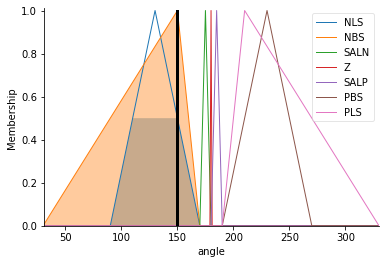

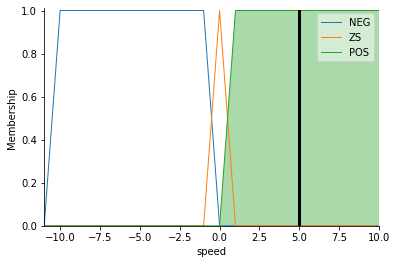

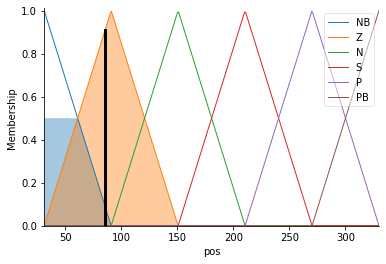

In [8]:
print("\nAngle: %d \nSpeed: %d \nPos: %5.2f" %(
        angleSim,
        speedSim,
        valorPendulo))


angle.view(sim=CalculoPendulo)
speed.view(sim=CalculoPendulo)
pos.view(sim=CalculoPendulo)

plt.show()